In [1]:
# import the necessary libraries
import math
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# displays output inline
%matplotlib inline

##This code uses  the MNIST digits classification dataset to fit a machine learning model to o classify MNIST handwritten digit images using PyTorch.

##Data set from: https://keras.io/api/datasets/fashion_mnist/

# Data Preprocessing

In [3]:
# use MNIST digits classification dataset
tf.keras.datasets.mnist.load_data(path="mnist.npz")
(in_train, out_train), (in_valid, out_valid) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# 60,000 training images, each image is a grayscale image with size 28x28 pixels
# 10,000 testing images, each image is a grayscale image with size 28x28 pixels
# 10 total categories and each label is assigned a number between 0 and 9
in_train.shape, in_valid.shape, np.unique(out_train)

((60000, 28, 28),
 (10000, 28, 28),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [5]:
# scale the values between 0 and 1 for both training and validation sets
in_train = in_train / 255.0
in_valid = in_valid / 255.0

In [6]:
# define ten categories from 0 to 9
class_names = {index:cn for index, cn in enumerate(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])}

# Training Set

In [7]:
#Prompt the user "How many rows of training images would you like to review?" 
#and output corresponding number of rows with ten images on each row. 
num = int(input("How many rows of training images would you like to review?"))

How many rows of training images would you like to review?5


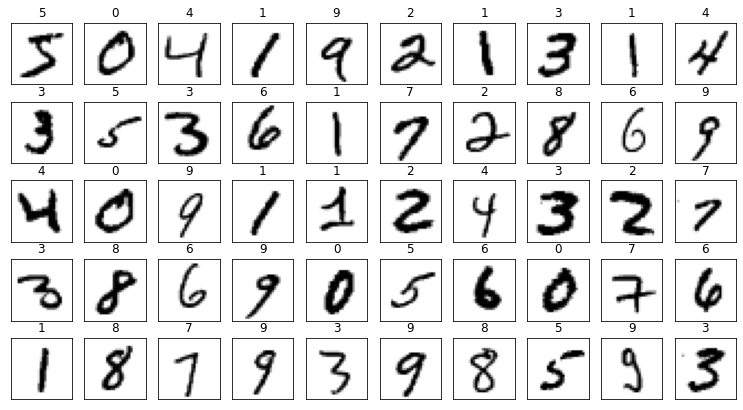

In [8]:
def plot(images, labels, predictions=None):
    # create a grid with 10 columns
    # num is the number of rows
    n_cols = min(10, len(images))
    n_rows = num
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols + 3, n_rows + 2))
    if predictions is None:
        predictions = [None] * len(labels)
    for index, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes.flat[index]
        ax.imshow(x, cmap=plt.cm.binary)
        ax.set_title(class_names[y_true])
        if y_pred is not None:
            ax.set_xlabel(class_names[y_pred])
        ax.set_xticks([])
        ax.set_yticks([])

# plot first 10 * num images
plot(in_train[:10*num], out_train[:10*num])   

# Model in Keras

##Set 4

In [23]:
model = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)), #Set4: (28,28)
    keras.layers.Dense(130, activation="relu"), #Set4: (128)
    keras.layers.Dense(10, activation="softmax") #Set4: (10)
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(in_train, out_train, batch_size=30, epochs=40, validation_split=0.04)

Epoch 1/40
1920/1920 [==============================] - 5s 3ms/step - loss: 0.2616 - accuracy: 0.9240 - val_loss: 0.1089 - val_accuracy: 0.9721
Epoch 2/40
1920/1920 [==============================] - 5s 2ms/step - loss: 0.1125 - accuracy: 0.9660 - val_loss: 0.0844 - val_accuracy: 0.9775
Epoch 3/40
1920/1920 [==============================] - 5s 3ms/step - loss: 0.0770 - accuracy: 0.9767 - val_loss: 0.0706 - val_accuracy: 0.9796
Epoch 4/40
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0584 - accuracy: 0.9822 - val_loss: 0.0732 - val_accuracy: 0.9837
Epoch 5/40
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0439 - accuracy: 0.9865 - val_loss: 0.0754 - val_accuracy: 0.9812
Epoch 6/40
1920/1920 [==============================] - 5s 2ms/step - loss: 0.0354 - accuracy: 0.9891 - val_loss: 0.0784 - val_accuracy: 0.9829
Epoch 7/40
1920/1920 [==============================] - 5s 3ms/step - loss: 0.0273 - accuracy: 0.9919 - val_loss: 0.0863 - val_accuracy:

In [24]:
loss, accuracy = model.evaluate(in_valid, out_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.1243 - accuracy: 0.9805


# Validation Set

In [19]:
# predict the validation set
probs = model.predict(in_valid)
print(probs.argmax(axis=1))
# another way to do the same thing
preds = model.predict(in_valid).argsort()[:,-1]
print(preds)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


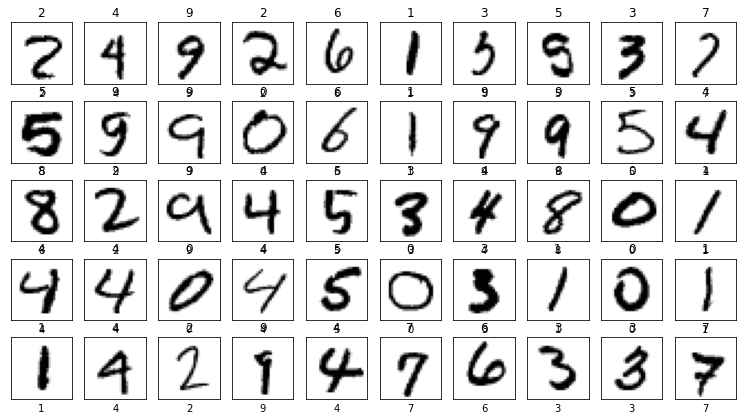

In [20]:
# plot (10 * num) random data
rand_idxs = np.random.permutation(len(in_valid))[:10 * num]
plot(in_valid[rand_idxs], out_valid[rand_idxs], preds[rand_idxs])

# Application

In [21]:
from ipywidgets import interact, widgets
#Add caption to note how to use this application
caption = widgets.Label(value='move the circle button to change the image index')
display(caption)
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(in_valid) - 1, description="Image index")
@interact(index=img_idx_slider)
def visualize_prediction(index=0):
    fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
    ax1.imshow(in_valid[index], cmap=plt.cm.binary)
    ax1.set_title("Real number is %s\n" % class_names[out_valid[index]]+"Predict number is %s" % class_names[preds[index]])
    ax2.bar(x=[class_names[index] for index in range(10)], height=probs[index]*100)
    ax2.set_title("Probability for each number classification")
    ax2.set_ylabel("probability\n%")
    plt.xticks(rotation=0)


Label(value='move the circle button to change the image index')

interactive(children=(IntSlider(value=0, description='Image index', max=9999), Output()), _dom_classes=('widge…